# Data Analysis and Visualization

In [4]:
#Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mounting Google Drive to Access Files in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Loading the Dataset from CSV File
d1 = pd.read_csv('/content/drive/MyDrive/glass.csv')


In [7]:
#Visualize the data of 5 rows
d1.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
d1['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [9]:
# Displaying Information About the DataFrame
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
## Generating Descriptive Statistics for the DataFrame
d1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
#Checking null value count for each columns
d1.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


# Scatter Plot Visualization of RI and Na Against Glass Types
First Plot (RI vs Type):
This plot shows how the refractive index (RI) varies across different Type categories. Different colors represent different types, helping identify clusters or trends.

Second Plot (Na vs Type):
Sodium content (Na) is compared with Type. This could show patterns like which types have higher or lower sodium concentrations.

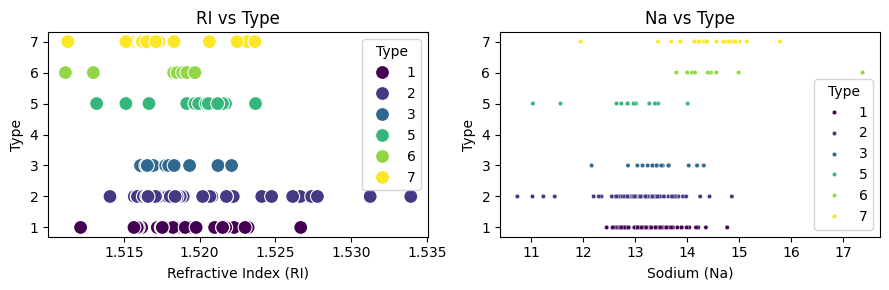

In [12]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(x=d1['RI'], y=d1['Type'], hue=d1['Type'], palette='viridis', s=100)
plt.title('RI vs Type')
plt.xlabel('Refractive Index (RI)')
plt.ylabel('Type')

# Scatter plot for Na vs Type
plt.subplot(1, 2, 2)
sns.scatterplot(x=d1['Na'], y=d1['Type'], hue=d1['Type'], palette='viridis', s=10)
plt.title('Na vs Type')
plt.xlabel('Sodium (Na)')
plt.ylabel('Type')

plt.tight_layout()
plt.show()

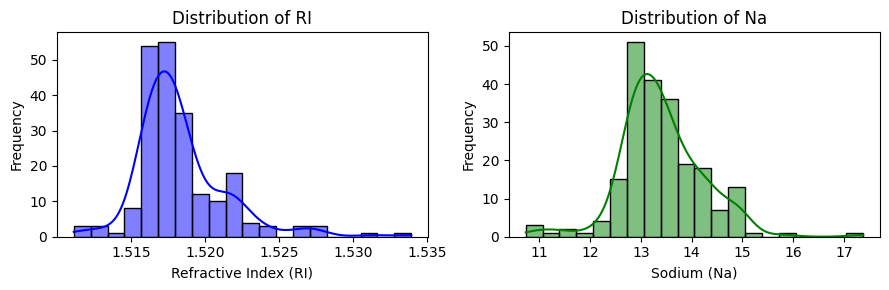

In [13]:
# Plot histograms for RI and Na
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
sns.histplot(d1['RI'], bins=20, kde=True, color='blue')
plt.title('Distribution of RI')
plt.xlabel('Refractive Index (RI)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(d1['Na'], bins=20, kde=True, color='green')
plt.title('Distribution of Na')
plt.xlabel('Sodium (Na)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X = d1.drop(columns=['Type']) # Features
y = d1['Type']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.25)
print("Training Data: "+ str(len(x_train)))
print("Testing Data:"+str(len(x_test)))

Training Data: 160
Testing Data:54


In [15]:
# Checking the Shape of the DataFrame
d1.shape

(214, 10)

# Model Training and Evaluation: Comparison of Multiple Classifiers

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100,max_depth=8, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=52),
    #"SVC": SVC(random_state=52),
    "DecisionTree": DecisionTreeClassifier(max_depth=3, random_state=32),
    #"AdaBoost": AdaBoostClassifier(random_state=52),
    "GradientBoosting": GradientBoostingClassifier(learning_rate = 0.5, max_depth = 4, n_estimators= 100, random_state=32)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Model Accuracy: {accuracy:0.4f}\n")


RandomForest Model Accuracy: 0.7963

LogisticRegression Model Accuracy: 0.6667

DecisionTree Model Accuracy: 0.6667

GradientBoosting Model Accuracy: 0.8333



# Hyperparameter Tuning using Grid Search for all algorithms


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define parameter grids for each model
param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },

    "DecisionTree": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [2,3, 5]
    }
}

# Define the models
models = {
    "RandomForest": RandomForestClassifier(random_state=1),
    "LogisticRegression": LogisticRegression(random_state=52),
    #"SVC": SVC(random_state=52),
    "DecisionTree": DecisionTreeClassifier(random_state=52),
    #"AdaBoost": AdaBoostClassifier(random_state=52),
    "GradientBoosting": GradientBoostingClassifier(learning_rate = 0.5, max_depth = 4, n_estimators= 100, random_state=32)
}

# Perform GridSearchCV and evaluate the best model for each algorithm
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")

    # Perform GridSearchCV with the corresponding parameter grid
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3)

    # Fit the model with GridSearchCV
    grid_search.fit(x_train, y_train)

    # Get the best model (estimator) from GridSearchCV
    best_clf = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_clf.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"{model_name} Model Accuracy: {accuracy:0.4f}\n")


Performing GridSearchCV for RandomForest...
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RandomForest Model Accuracy: 0.7963

Performing GridSearchCV for LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
LogisticRegression Model Accuracy: 0.6481

Performing GridSearchCV for DecisionTree...
Best Parameters for DecisionTree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTree Model Accuracy: 0.7407

Performing GridSearchCV for GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
GradientBoosting Model Accuracy: 0.7778



# CHECKING ACCURACY

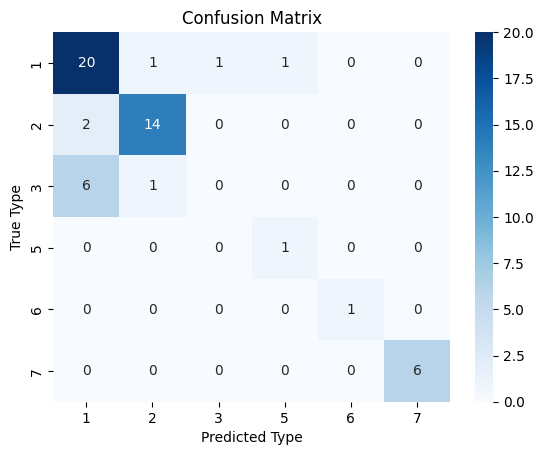


Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.87      0.78        23
           2       0.88      0.88      0.88        16
           3       0.00      0.00      0.00         7
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.78        54
   macro avg       0.68      0.79      0.72        54
weighted avg       0.70      0.78      0.74        54



In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=d1['Type'].unique(), yticklabels=d1['Type'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('True Type')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# GrdientBoostingClassifier

In [26]:
rfc = GradientBoostingClassifier(
    learning_rate = 0.5, max_depth = 4, n_estimators= 100,   # Limit features per split
    random_state=32
)

# Fit the adjusted model
rfc.fit(x_train, y_train)

print("Train Accuracy Score:", accuracy_score(y_train, rfc.predict(x_train)))
print("Test Accuracy Score:", accuracy_score(y_test, rfc.predict(x_test)))
accuracy = rfc.score(x_test,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

Train Accuracy Score: 1.0
Test Accuracy Score: 0.8333333333333334
accuracy:83.33%


# Summary

In [32]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GradientBoosting']
GridSearch_scores = [0.6481, 0/7407, 0.7963, 0.7778]
accuracies = [0.6667,0.6667,0.7963,0.8333]

results = pd.DataFrame({
    'Model': models,
    'GridSearch Score': GridSearch_scores,
    'Accuracy': accuracies
})

# Saving the results to a CSV file
results.to_csv('model_results.csv', index=False)

# Display the results
print(results.to_string(index=False))

              Model  GridSearch Score  Accuracy
Logistic Regression            0.6481    0.6667
      Decision Tree            0.0000    0.6667
      Random Forest            0.7963    0.7963
   GradientBoosting            0.7778    0.8333
